In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import qmcpy as qp
from simple_colors import *

## Generate some $x$ points

In [2]:
d = 1
n = 2**12
iidpts = qp.IIDStdUniform(d).gen_samples(n)
print("iid pts",iidpts)
sobpts = qp.Sobol(d).gen_samples(n)
print("sobol pts",sobpts)

iid pts [[0.61898941]
 [0.12822005]
 [0.73633545]
 ...
 [0.66067344]
 [0.29908478]
 [0.43315868]]
sobol pts [[0.11610243]
 [0.96629948]
 [0.45005615]
 ...
 [0.77432149]
 [0.25903945]
 [0.65905647]]


## Generate some $y=f(x)$ points

In [3]:
def testfun(x):
  # return np.exp(-5*x)*np.sin(2*np.pi*x)
    return sp.stats.norm.ppf(x)

In [4]:
yiid = testfun(iidpts)
ysob = testfun(sobpts)

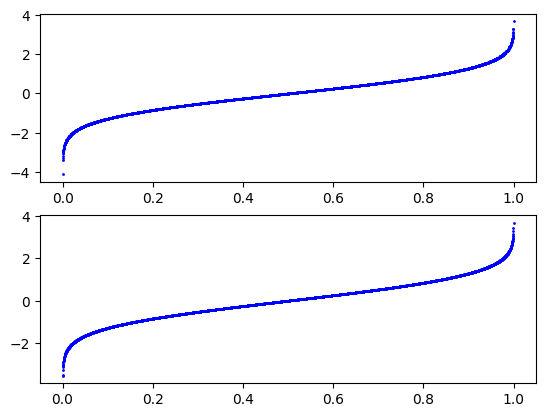

In [5]:
fig,ax = plt.subplots(2)
ax[0].plot(iidpts, yiid, 'b.', markersize = 2)
ax[1].plot(sobpts, ysob, 'b.', markersize = 2);

## Compute the empirical characteristic function

In [6]:
def ecf(y,t):
    return np.exp(np.sqrt(-1+0j)*y*t).mean(0)

In [8]:
right = 10
step = 0.01
tfreq = np.arange(-right,right,step)
small_n = int(np.sqrt(n))
ecfiidsmall = ecf(yiid[:small_n],tfreq)
ecfiid = ecf(yiid,tfreq)
ecfsobsmall = ecf(ysob[:small_n],tfreq)
ecfsob = ecf(ysob,tfreq)

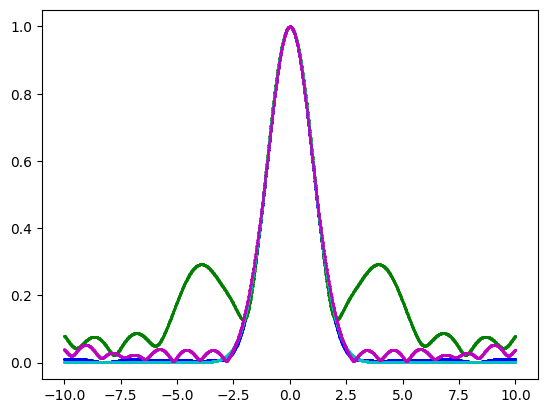

In [9]:
fig,ax = plt.subplots(1)
ax.plot(tfreq, np.absolute(ecfiid), 'b.', markersize = 2)
ax.plot(tfreq, np.absolute(ecfiidsmall), 'g.', markersize = 2)
ax.plot(tfreq, np.absolute(ecfsob), 'c.', markersize = 2)
ax.plot(tfreq, np.absolute(ecfsobsmall), 'm.', markersize = 2);